In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv
/kaggle/input/full-filled-brain-stroke-dataset/full_filled_stroke_data (1).csv


# Reading Data

In [29]:
df = pd.read_csv('../input/full-filled-brain-stroke-dataset/full_data.csv')
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

In [3]:
df.describe().T

count        mean        std    min    25%    50%     75%  \
age                4981.0   43.419859  22.662755   0.08  25.00  45.00   61.00   
hypertension       4981.0    0.096165   0.294848   0.00   0.00   0.00    0.00   
heart_disease      4981.0    0.055210   0.228412   0.00   0.00   0.00    0.00   
avg_glucose_level  4981.0  105.943562  45.075373  55.12  77.23  91.85  113.86   
bmi                4981.0   28.498173   6.790464  14.00  23.70  28.10   32.60   
stroke             4981.0    0.049789   0.217531   0.00   0.00   0.00    0.00   

                      max  
age                 82.00  
hypertension         1.00  
heart_disease        1.00  
avg_glucose_level  271.74  
bmi                 48.90  
stroke               1.00

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# EDA

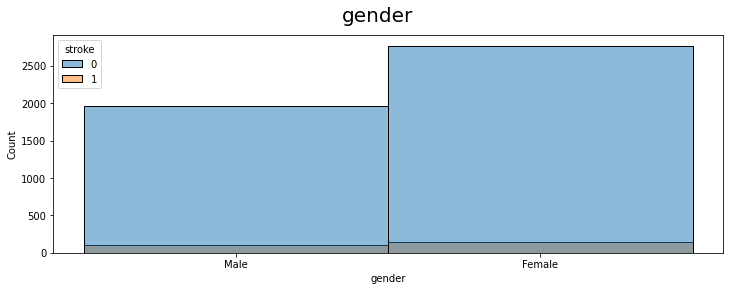

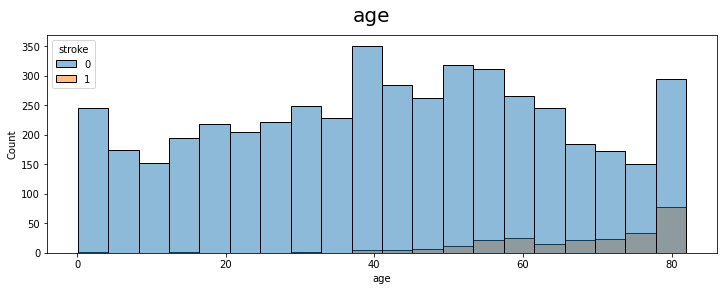

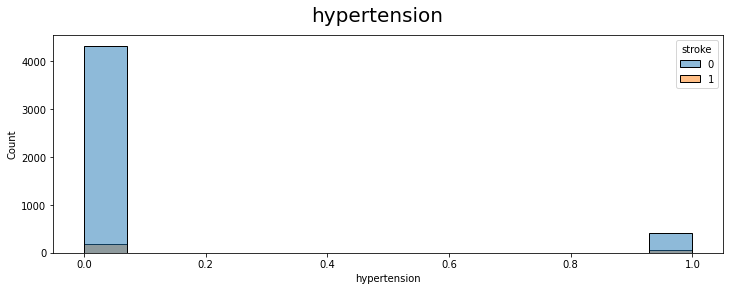

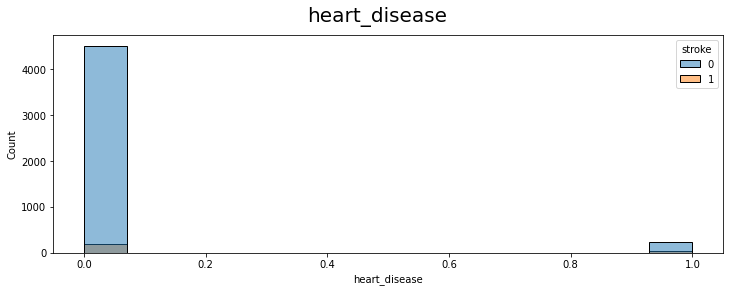

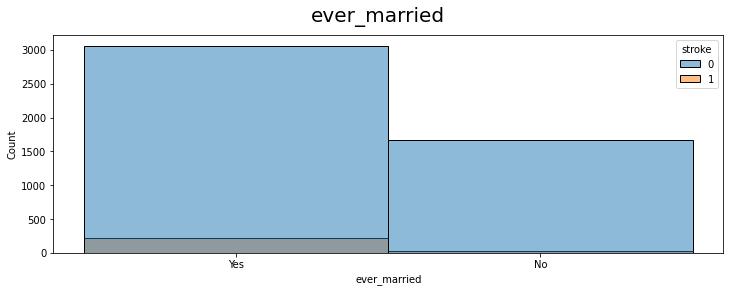

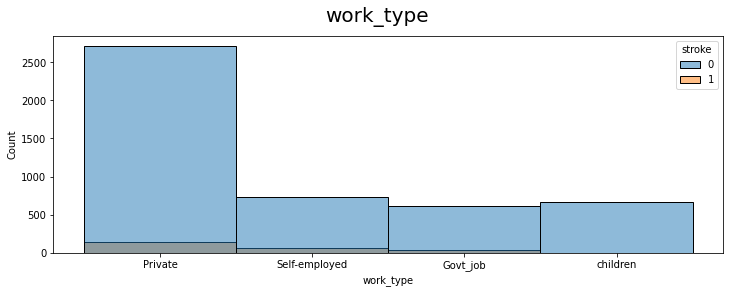

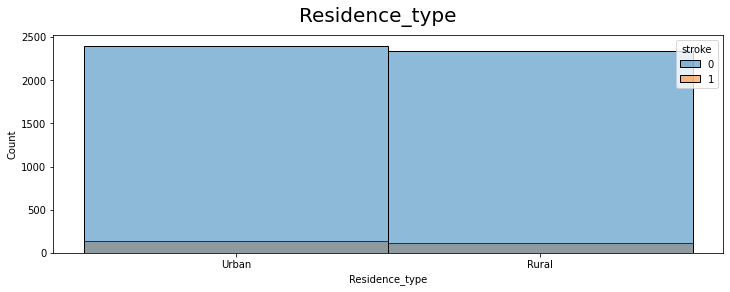

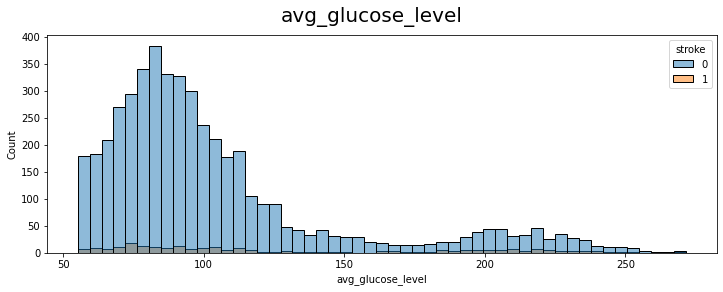

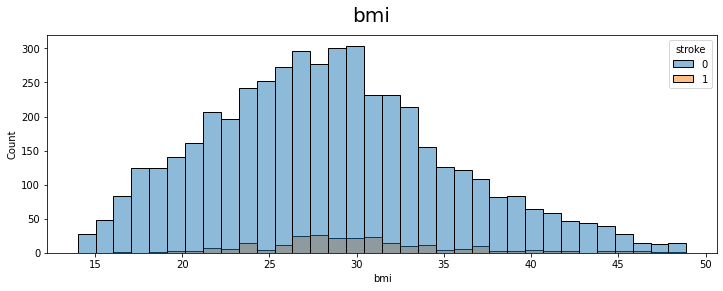

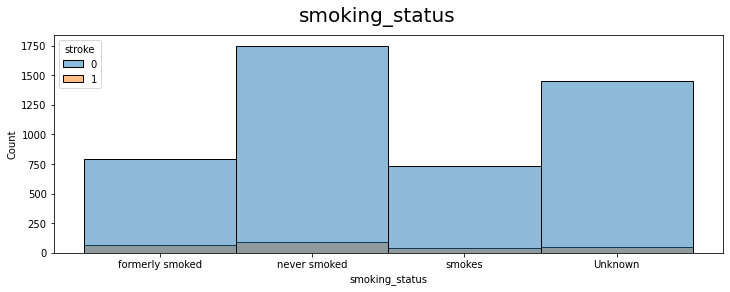

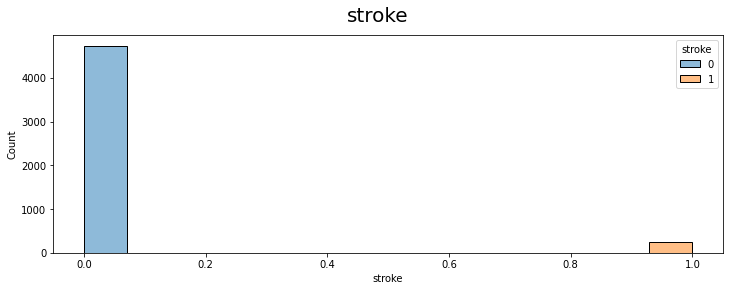

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for i in list(df.columns):
    fig, ax = plt.subplots(1, figsize=(12,4))
    sns.histplot(data=df, x=i, hue='stroke')
    plt.suptitle(i, fontsize=20)
    fig.show()

Due to "stroke" plot, we understand that the data is unbalance and this can be problematic in data splitting and model training.

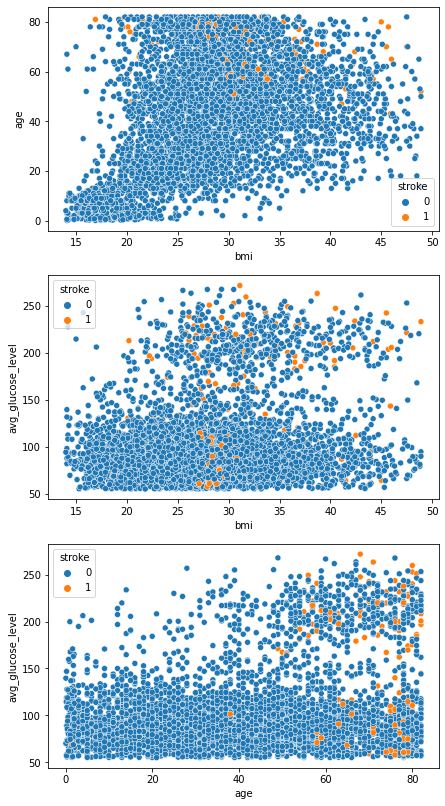

In [6]:
fig, ax = plt.subplots(nrows=3, figsize=(7,14))

sns.scatterplot(data=df, x='bmi', y='age', hue='stroke', ax=ax[0])
sns.scatterplot(data=df, x='bmi', y='avg_glucose_level', hue='stroke', ax=ax[1])
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', ax=ax[2])

fig.show()

<AxesSubplot:xlabel='gender', ylabel='smoking_status'>

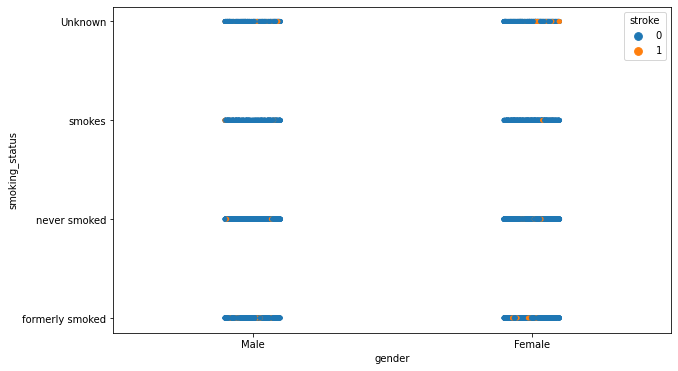

In [7]:
plt.figure(figsize=(10,6))
sns.stripplot(x="gender", y="smoking_status", hue="stroke", data=df)

<AxesSubplot:xlabel='gender', ylabel='heart_disease'>

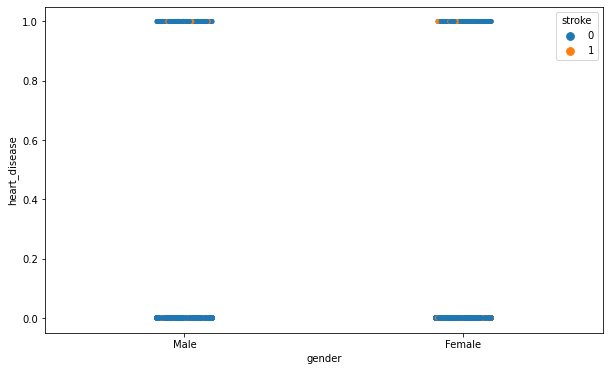

In [8]:
plt.figure(figsize=(10,6))
sns.stripplot(x="gender", y="heart_disease", hue="stroke", data=df)

<AxesSubplot:xlabel='gender', ylabel='hypertension'>

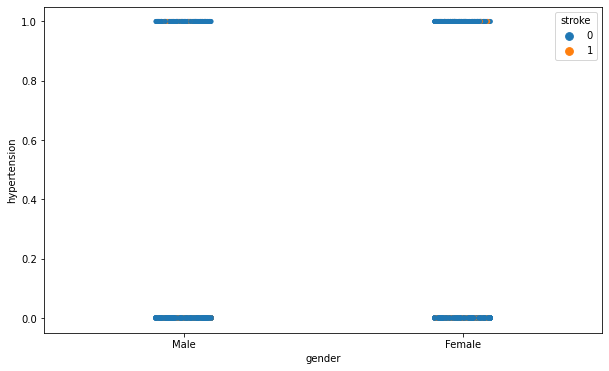

In [9]:
plt.figure(figsize=(10,6))
sns.stripplot(x="gender", y="hypertension", hue="stroke", data=df)

<AxesSubplot:xlabel='work_type', ylabel='hypertension'>

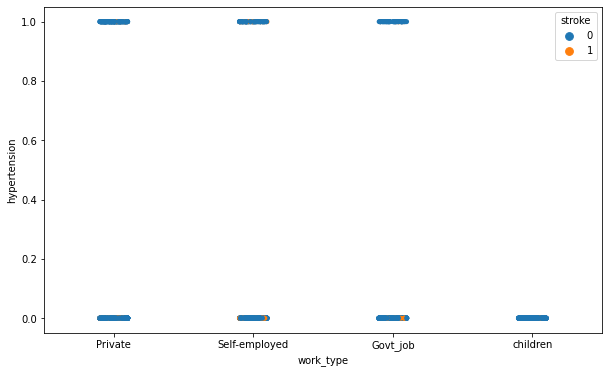

In [10]:
plt.figure(figsize=(10,6))
sns.stripplot(x="work_type", y="hypertension", hue="stroke", data=df)

<AxesSubplot:xlabel='work_type', ylabel='heart_disease'>

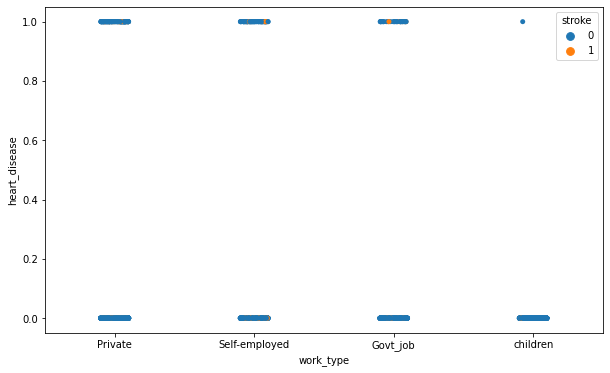

In [11]:
plt.figure(figsize=(10,6))
sns.stripplot(x="work_type", y="heart_disease", hue="stroke", data=df)

<AxesSubplot:xlabel='work_type', ylabel='smoking_status'>

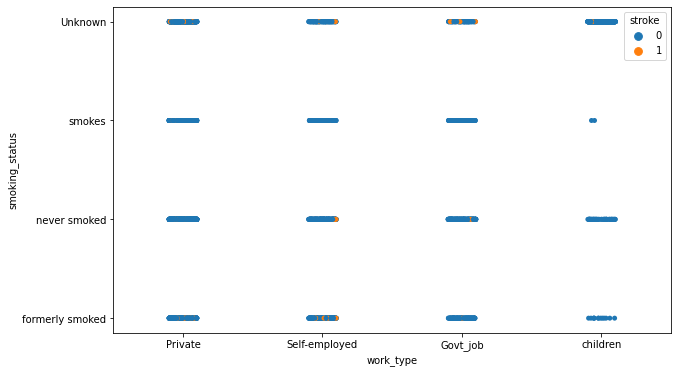

In [12]:
plt.figure(figsize=(10,6))
sns.stripplot(x="work_type", y="smoking_status", hue="stroke", data=df)

<AxesSubplot:xlabel='smoking_status', ylabel='hypertension'>

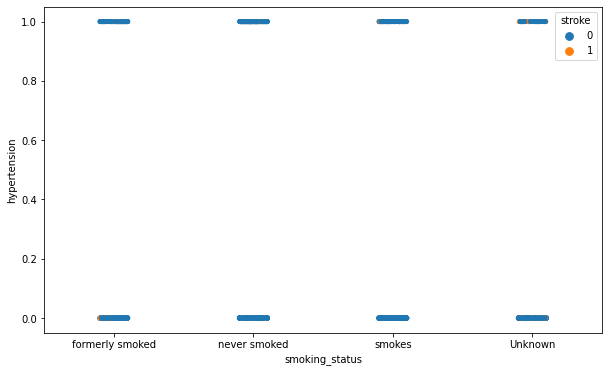

In [13]:
plt.figure(figsize=(10,6))
sns.stripplot(x="smoking_status", y="hypertension", hue="stroke", data=df)

<AxesSubplot:xlabel='smoking_status', ylabel='heart_disease'>

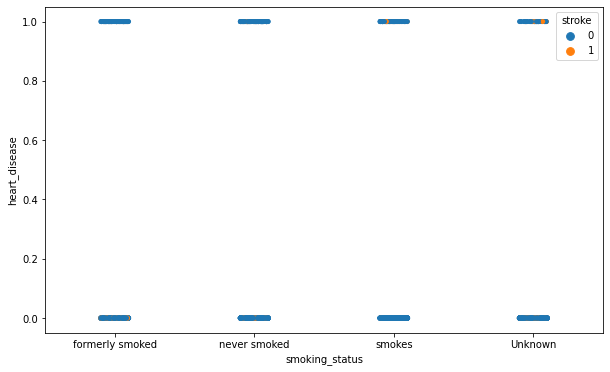

In [14]:
plt.figure(figsize=(10,6))
sns.stripplot(x="smoking_status", y="heart_disease", hue="stroke", data=df)

<AxesSubplot:xlabel='hypertension', ylabel='ever_married'>

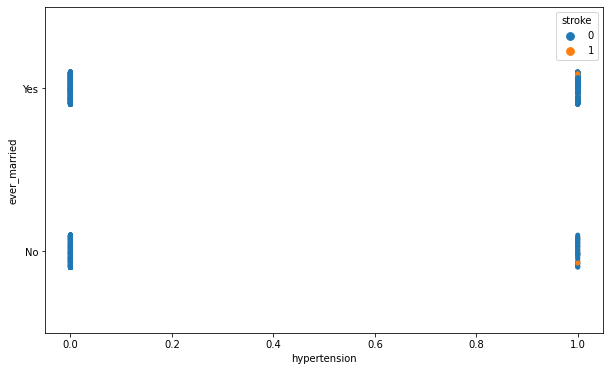

In [15]:
plt.figure(figsize=(10,6))
sns.stripplot(x="hypertension", y="ever_married", hue="stroke", data=df)

<AxesSubplot:xlabel='hypertension', ylabel='heart_disease'>

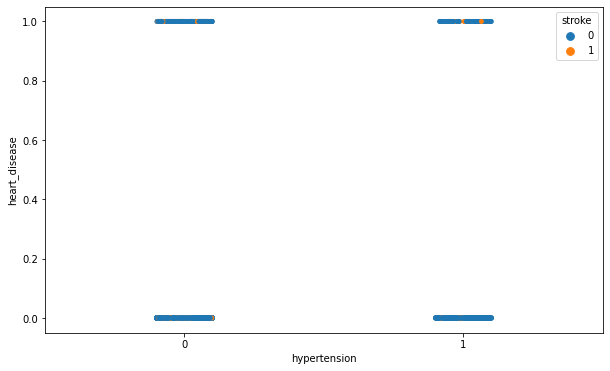

In [16]:
plt.figure(figsize=(10,6))
sns.stripplot(x="hypertension", y="heart_disease", hue="stroke", data=df)

<AxesSubplot:xlabel='Residence_type', ylabel='heart_disease'>

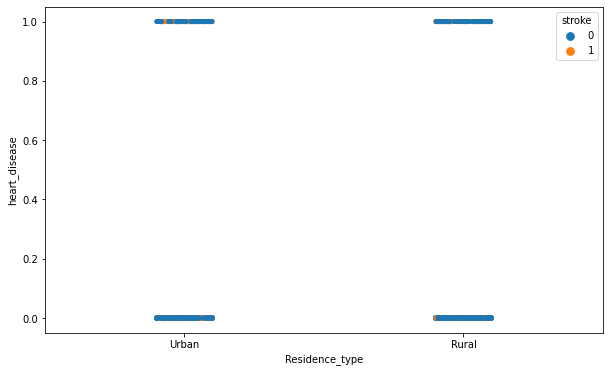

In [17]:
plt.figure(figsize=(10,6))
sns.stripplot(x="Residence_type", y='heart_disease', hue="stroke", data=df)

<AxesSubplot:xlabel='Residence_type', ylabel='hypertension'>

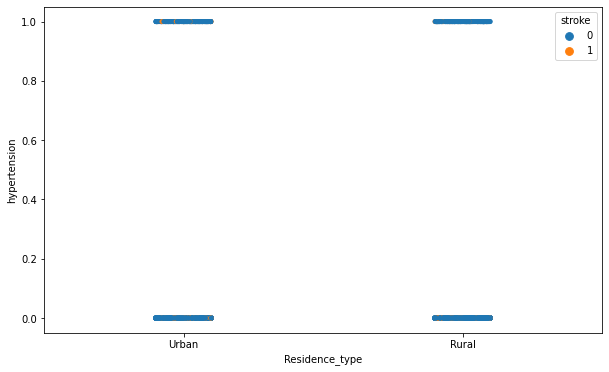

In [18]:
plt.figure(figsize=(10,6))
sns.stripplot(x="Residence_type", y='hypertension', hue="stroke", data=df)

# Preprocessing

Some Columns have objective type; let's see what they are

In [19]:
df.select_dtypes(include = object).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

It's better to know unique values of objective columns to use them in the future

In [20]:
print('Gender Types: ', df.gender.unique())
print('Ever Married Types: ', df.ever_married.unique())
print('Work Types: ', df.work_type.unique())
print('Residence Types: ', df.Residence_type.unique())
print('Smoking Status Types: ', df.smoking_status.unique())

Gender Types:  ['Male' 'Female']
Ever Married Types:  ['Yes' 'No']
Work Types:  ['Private' 'Self-employed' 'Govt_job' 'children']
Residence Types:  ['Urban' 'Rural']
Smoking Status Types:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


As you see, some of categorical columns have only two unique values; like 'Gender' or 'Ever Married' columns. We can simply use 'get_dummies' function to deal with them but in this case, the number of features and the complexity of the model will increase.

So, to avoid of this,  I convert the values of 'gender', 'ever married' and 'residence type' columns to binary values;

In [30]:
#change gender values to male=1 , female=0
gndr_col = pd.get_dummies(df["gender"])
gndr_col = gndr_col.drop(['Female'], axis=1)

#change ever_married values to Yes=1 , No=1
mrd_col = pd.get_dummies(df["ever_married"])
mrd_col = mrd_col.drop(['No'], axis=1)

#change residence_type values to urban=1 , rural=0
urbn_col = pd.get_dummies(df["Residence_type"])
urbn_col = urbn_col.drop(['Rural'], axis=1)

#concating new column and dateframe to build final dataset
df = pd.concat((df, gndr_col, mrd_col, urbn_col), axis=1)
df = df.drop(['gender', 'ever_married', 'Residence_type'], axis=1)
df = df.rename(columns={'Male': 'gender', 'Yes': 'ever_married'})
df

age  hypertension  heart_disease      work_type  avg_glucose_level  \
0     67.0             0              1        Private             228.69   
1     80.0             0              1        Private             105.92   
2     49.0             0              0        Private             171.23   
3     79.0             1              0  Self-employed             174.12   
4     81.0             0              0        Private             186.21   
...    ...           ...            ...            ...                ...   
4976  41.0             0              0        Private              70.15   
4977  40.0             0              0        Private             191.15   
4978  45.0             1              0       Govt_job              95.02   
4979  40.0             0              0        Private              83.94   
4980  80.0             1              0        Private              83.75   

       bmi   smoking_status  stroke  gender  ever_married  Urban  
0     36.6  formerly smoked       1       1             1      1  
1     32.5     never smoked       1       1             1      0  
2     34.4           smokes       1       0             1      1  
3     24.0     never smoked       1       0             1      0  
4     29.0  formerly smoked       1       1             1      1  
...    ...              ...     ...     ...           ...    ...  
4976  29.8  formerly smoked       0       1             0      0  
4977  31.1           smokes       0       1             1      1  
4978  31.8           smokes       0       0             1      0  
4979  30.0           smokes       0       1             1      0  
4980  29.1     never smoked       0       0             1      1  

[4981 rows x 11 columns]

converting rest of categorical columns using get_dummies function

In [31]:
df = pd.get_dummies(df, drop_first=True)
df

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
1     80.0             0              1             105.92  32.5       1   
2     49.0             0              0             171.23  34.4       1   
3     79.0             1              0             174.12  24.0       1   
4     81.0             0              0             186.21  29.0       1   
...    ...           ...            ...                ...   ...     ...   
4976  41.0             0              0              70.15  29.8       0   
4977  40.0             0              0             191.15  31.1       0   
4978  45.0             1              0              95.02  31.8       0   
4979  40.0             0              0              83.94  30.0       0   
4980  80.0             1              0              83.75  29.1       0   

      gender  ever_married  Urban  work_type_Private  work_type_Self-employed  \
0          1             1      1                  1                        0   
1          1             1      0                  1                        0   
2          0             1      1                  1                        0   
3          0             1      0                  0                        1   
4          1             1      1                  1                        0   
...      ...           ...    ...                ...                      ...   
4976       1             0      0                  1                        0   
4977       1             1      1                  1                        0   
4978       0             1      0                  0                        0   
4979       1             1      0                  1                        0   
4980       0             1      1                  1                        0   

      work_type_children  smoking_status_formerly smoked  \
0                      0                               1   
1                      0                               0   
2                      0                               0   
3                      0                               0   
4                      0                               1   
...                  ...                             ...   
4976                   0                               1   
4977                   0                               0   
4978                   0                               0   
4979                   0                               0   
4980                   0                               0   

      smoking_status_never smoked  smoking_status_smokes  
0                               0                      0  
1                               1                      0  
2                               0                      1  
3                               1                      0  
4                               0                      0  
...                           ...                    ...  
4976                            0                      0  
4977                            0                      1  
4978                            0                      1  
4979                            0                      1  
4980                            1                      0  

[4981 rows x 15 columns]

Normalizing the data using MinMax Scaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(["stroke"], axis=1)
y = df['stroke']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Splitting data to train and test sets

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.3, random_state=42)

# SVM

Since there are many hyperparameters for each algorithm, we're going to use GridSearchCV tuner to find the best values for the hyperparameters. You can use RandomizedSearchCV too.

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(random_state=42)
svm_search_space = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "C": list(np.random.random_sample((5,))),
    "degree": [2, 3, 4],
    'class_weight': ['balanced', None],
    "gamma": ['scale', 'auto'] + list(np.random.random_sample((4,)))
}

svm_GS = GridSearchCV(estimator = svm_model,
                      param_grid = svm_search_space,
                      scoring = ["accuracy", "f1"],
                      refit = "accuracy",
                      cv = 5,
                      n_jobs = -1,
                      verbose = 4)

svm_GS.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 3/5] END C=0.0134642180676241, class_weight=balanced, degree=2, gamma=scale, kernel=linear; accuracy: (test=0.637) f1: (test=0.186) total time=   0.7s
[CV 3/5] END C=0.0134642180676241, class_weight=balanced, degree=2, gamma=scale, kernel=poly; accuracy: (test=0.680) f1: (test=0.206) total time=   0.8s
[CV 2/5] END C=0.0134642180676241, class_weight=balanced, degree=2, gamma=scale, kernel=rbf; accuracy: (test=0.601) f1: (test=0.173) total time=   1.0s
[CV 1/5] END C=0.0134642180676241, class_weight=balanced, degree=2, gamma=scale, kernel=sigmoid; accuracy: (test=0.448) f1: (test=0.131) total time=   1.4s
[CV 5/5] END C=0.0134642180676241, class_weight=balanced, degree=2, gamma=scale, kernel=sigmoid; accuracy: (test=0.451) f1: (test=0.139) total time=   1.5s
[CV 1/5] END C=0.0134642180676241, class_weight=balanced, degree=2, gamma=auto, kernel=poly; accuracy: (test=0.951) f1: (test=0.000) total time=   0.9s
[CV 5/5] END

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0134642180676241, 0.22032947368710087,
                               0.6910129011324119, 0.25954909765559664,
                               0.11486182947141022],
                         'class_weight': ['balanced', None],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.37705627140748255,
                                   0.31636637161402303, 0.41972624951078397,
                                   0.8898182122586529],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=4)

In [47]:
print(svm_GS.best_params_)
print(svm_GS.best_score_)

{'C': 0.22032947368710087, 'class_weight': None, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
0.951520433458169


In [48]:
from sklearn.metrics import classification_report

model_pred = svm_GS.predict(X_test)
svm_classifier_report = classification_report(y_test, model_pred , output_dict=True, zero_division=1)
svm_results = pd.DataFrame(svm_classifier_report).transpose()
svm_results

precision    recall  f1-score      support
0              0.947826  1.000000  0.973214  1417.000000
1              1.000000  0.000000  0.000000    78.000000
accuracy       0.947826  0.947826  0.947826     0.947826
macro avg      0.973913  0.500000  0.486607  1495.000000
weighted avg   0.950548  0.947826  0.922438  1495.000000

In [49]:
svm_models_df = pd.DataFrame(svm_GS.cv_results_)
svm_models_df = svm_models_df.sort_values("rank_test_accuracy")
svm_models_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
265       0.264877      0.038214         0.023495        0.001068  0.220329   
417       0.302867      0.035843         0.023605        0.000692  0.691013   
662       0.153223      0.006340         0.051004        0.003937  0.114862   
650       0.143196      0.005010         0.046809        0.002731  0.114862   
528       0.059536      0.002493         0.015622        0.000928  0.259549   

    param_class_weight param_degree param_gamma param_kernel  \
265               None            4       scale         poly   
417               None            4    0.377056         poly   
662               None            2    0.316366          rbf   
650               None            2       scale          rbf   
528               None            3       scale       linear   

                                                params  ...  \
265  {'C': 0.22032947368710087, 'class_weight': Non...  ...   
417  {'C': 0.6910129011324119, 'class_weight': None...  ...   
662  {'C': 0.11486182947141022, 'class_weight': Non...  ...   
650  {'C': 0.11486182947141022, 'class_weight': Non...  ...   
528  {'C': 0.25954909765559664, 'class_weight': Non...  ...   

     std_test_accuracy  rank_test_accuracy  split0_test_f1  split1_test_f1  \
265           0.000568                   1        0.000000             0.0   
417           0.001683                   2        0.108108             0.0   
662           0.000028                   3        0.000000             0.0   
650           0.000028                   3        0.000000             0.0   
528           0.000028                   3        0.000000             0.0   

     split2_test_f1  split3_test_f1  split4_test_f1  mean_test_f1  \
265             0.0        0.057143        0.000000      0.011429   
417             0.0        0.057143        0.108108      0.054672   
662             0.0        0.000000        0.000000      0.000000   
650             0.0        0.000000        0.000000      0.000000   
528             0.0        0.000000        0.000000      0.000000   

     std_test_f1  rank_test_f1  
265     0.022857           409  
417     0.048363           369  
662     0.000000           416  
650     0.000000           416  
528     0.000000           416  

[5 rows x 26 columns]

# Logistic Regression Classifier

In [50]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state=42)
LR_search_space = {
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "penalty": ['l1', 'l2', 'elasticnet', None],
    "C": list(np.random.random_sample((10,))),
    "class_weight": ['balanced', None],
    "warm_start": [True, False]
}

LR_GS = GridSearchCV(estimator = LR_model,
                     param_grid = LR_search_space,
                     scoring = ["accuracy", "f1"],
                     refit = "accuracy",
                     cv = 5,
                     n_jobs = -1,
                     verbose = 4)

LR_GS.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits

[CV 4/5] END C=0.11486182947141022, class_weight=None, degree=3, gamma=0.8898182122586529, kernel=rbf; accuracy: (test=0.951) f1: (test=0.000) total time=   0.2s
[CV 3/5] END C=0.11486182947141022, class_weight=None, degree=3, gamma=0.8898182122586529, kernel=sigmoid; accuracy: (test=0.948) f1: (test=0.000) total time=   0.2s
[CV 3/5] END C=0.11486182947141022, class_weight=None, degree=4, gamma=scale, kernel=linear; accuracy: (test=0.951) f1: (test=0.000) total time=   0.1s
[CV 2/5] END C=0.11486182947141022, class_weight=None, degree=4, gamma=scale, kernel=poly; accuracy: (test=0.951) f1: (test=0.000) total time=   0.2s
[CV 5/5] END C=0.11486182947141022, class_weight=None, degree=4, gamma=scale, kernel=poly; accuracy: (test=0.951) f1: (test=0.000) total time=   0.3s
[CV 5/5] END C=0.11486182947141022, class_weight=None, degree=4, gamma=scale, kernel=rbf; accuracy: (test=0.951) f1: (test=0.000) total time=   0.2s
[CV 1/

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter


[CV 1/5] END C=0.2413571684662843, class_weight=None, penalty=l1, solver=newton-cg, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END C=0.2413571684662843, class_weight=None, penalty=l1, solver=newton-cg, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END C=0.2413571684662843, class_weight=None, penalty=l1, solver=newton-cg, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END C=0.2413571684662843, class_weight=None, penalty=l1, solver=newton-cg, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END C=0.2413571684662843, class_weight=None, penalty=l1, solver=newton-cg, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END C=0.2413571684662843, class_weight=None, penalty=l1, solver=lbfgs, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END C=0.2413571684662843, class_weight=None, penalty=

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter


[CV 1/5] END C=0.2413571684662843, class_weight=None, penalty=None, solver=saga, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END C=0.2413571684662843, class_weight=None, penalty=None, solver=saga, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END C=0.8699994978329249, class_weight=balanced, penalty=l1, solver=newton-cg, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END C=0.8699994978329249, class_weight=balanced, penalty=l1, solver=newton-cg, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END C=0.8699994978329249, class_weight=balanced, penalty=l1, solver=lbfgs, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END C=0.8699994978329249, class_weight=balanced, penalty=l1, solver=lbfgs, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END C=0.8699994978329249, class_weight=balanced, p

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter


[CV 1/5] END C=0.2413571684662843, class_weight=None, penalty=None, solver=saga, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END C=0.2413571684662843, class_weight=None, penalty=None, solver=saga, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END C=0.2413571684662843, class_weight=None, penalty=None, solver=saga, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END C=0.2413571684662843, class_weight=None, penalty=None, solver=saga, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END C=0.2413571684662843, class_weight=None, penalty=None, solver=saga, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END C=0.8699994978329249, class_weight=balanced, penalty=l1, solver=newton-cg, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END C=0.8699994978329249, class_weight=balanced, penalty=l1,

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter


[CV 3/5] END C=0.09578564215398666, class_weight=None, penalty=l1, solver=lbfgs, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END C=0.09578564215398666, class_weight=None, penalty=l1, solver=lbfgs, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END C=0.09578564215398666, class_weight=None, penalty=l1, solver=lbfgs, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END C=0.09578564215398666, class_weight=None, penalty=l1, solver=liblinear, warm_start=True; accuracy: (test=0.951) f1: (test=0.000) total time=   0.0s
[CV 2/5] END C=0.09578564215398666, class_weight=None, penalty=l1, solver=liblinear, warm_start=True; accuracy: (test=0.951) f1: (test=0.000) total time=   0.0s
[CV 3/5] END C=0.09578564215398666, class_weight=None, penalty=l1, solver=liblinear, warm_start=True; accuracy: (test=0.951) f1: (test=0.000) total time=   0.0s
[CV 4/5] END C=0.09578564215398666, class_weight=None,

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2600 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.5848587103299336, 0.43645411601483286,
                               0.7279006322996388, 0.11029093817846314,
                               0.2413571684662843, 0.8699994978329249,
                               0.6135606486383675, 0.6049764347277472,
                               0.09578564215398666, 0.13781497696571088],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'warm_start': [True, False]},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=4)

Let's see what are the best hyperparameters found by GridSearchCV

In [51]:
print(LR_GS.best_params_)
print(LR_GS.best_score_)

{'C': 0.5848587103299336, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear', 'warm_start': True}
0.9512334894122579


Time to test the model

In [53]:
model_pred = LR_GS.predict(X_test)
LR_classifier_report = classification_report(y_test, model_pred , output_dict=True, zero_division=1)
LR_results = pd.DataFrame(LR_classifier_report).transpose()
LR_results

precision    recall  f1-score      support
0              0.947826  1.000000  0.973214  1417.000000
1              1.000000  0.000000  0.000000    78.000000
accuracy       0.947826  0.947826  0.947826     0.947826
macro avg      0.973913  0.500000  0.486607  1495.000000
weighted avg   0.950548  0.947826  0.922438  1495.000000

It is better to save the details of each model in a Pandas DataFrame so that we can analyze them later. I have sorted them based on the best accuracy. You can do that according to F1 score.

In [56]:
LR_models_df = pd.DataFrame(LR_GS.cv_results_)
LR_models_df = LR_models_df.sort_values("rank_test_accuracy")
LR_models_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
611       0.042681      0.002022         0.002455        0.000182  0.604976   
294       0.010650      0.000524         0.002731        0.000134  0.110291   
293       0.019055      0.000783         0.002602        0.000124  0.110291   
619       0.036691      0.003694         0.002391        0.000231  0.604976   
292       0.018171      0.000875         0.002397        0.000134  0.110291   

    param_class_weight param_penalty param_solver param_warm_start  \
611               None            l2    newton-cg            False   
294               None            l2    liblinear             True   
293               None            l2        lbfgs            False   
619               None            l2         saga            False   
292               None            l2        lbfgs             True   

                                                params  ...  \
611  {'C': 0.6049764347277472, 'class_weight': None...  ...   
294  {'C': 0.11029093817846314, 'class_weight': Non...  ...   
293  {'C': 0.11029093817846314, 'class_weight': Non...  ...   
619  {'C': 0.6049764347277472, 'class_weight': None...  ...   
292  {'C': 0.11029093817846314, 'class_weight': Non...  ...   

     std_test_accuracy  rank_test_accuracy  split0_test_f1  split1_test_f1  \
611           0.000028                   1             0.0             0.0   
294           0.000028                   1             0.0             0.0   
293           0.000028                   1             0.0             0.0   
619           0.000028                   1             0.0             0.0   
292           0.000028                   1             0.0             0.0   

     split2_test_f1  split3_test_f1  split4_test_f1  mean_test_f1  \
611             0.0             0.0             0.0           0.0   
294             0.0             0.0             0.0           0.0   
293             0.0             0.0             0.0           0.0   
619             0.0             0.0             0.0           0.0   
292             0.0             0.0             0.0           0.0   

     std_test_f1  rank_test_f1  
611          0.0           141  
294          0.0           141  
293          0.0           141  
619          0.0           141  
292          0.0           141  

[5 rows x 26 columns]

# Random Forest

Since there are many hyperparameters for each algorithm, we're going to use GridSearchCV tuner to find the best values for the hyperparameters. You can use RandomizedSearchCV too.

In [57]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state=42)
RF_search_space = {
    "n_estimators": [100, 200, 400, 500],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_features": ['sqrt', None],
    "class_weight": ['balanced', 'balanced_subsample', None],
    "max_depth": [5, 6, 7, 8],
    "bootstrap": [True, False],
    "oob_score": [True, False],
    "warm_start": [True, False]
}

RF_GS = GridSearchCV(estimator = RF_model,
                     param_grid = RF_search_space,
                     scoring = ["accuracy", "f1"],
                     refit = "accuracy",
                     cv = 5,
                     n_jobs = -1,
                     verbose = 4)

RF_GS.fit(X_train, y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.750) f1: (test=0.237) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.727) f1: (test=0.208) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.785) f1: (test=0.235) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.750) f1: (test=0.237) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accu

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.808) f1: (test=0.230) total time=   3.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.811) f1: (test=0.205) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.781) f1: (test=0.223) total time=   0.5s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.795) f1: (test=0.227) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; acc

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.813) f1: (test=0.253) total time=   3.8s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.786) f1: (test=0.228) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.811) f1: (test=0.205) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.223) total time=   0.4s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; acc

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.831) f1: (test=0.244) total time=   3.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.216) total time=   3.6s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.846) f1: (test=0.241) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.851) f1: (test=0.235) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; acc

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.177) total time=   4.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.857) f1: (test=0.242) total time=   3.8s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.177) total time=   3.8s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.890) f1: (test=0.238) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; acc

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.885) f1: (test=0.259) total time=   4.6s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.895) f1: (test=0.263) total time=   3.8s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.885) f1: (test=0.259) total time=   3.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.895) f1: (test=0.263) total time=   3.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.798) f1: (test=0.238) total time=   2.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.227) total time=   4.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.787) f1: (test=0.251) total time=   4.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.801) f1: (test=0.265) total time=   4.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.791) f1: (test=0.247) total time=   4.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.787) f1: (test=0.251) total time=   3.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.801) f1: (test=0.240) total time=   3.7s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.791) f1: (test=0.247) total time=   3.7s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.835) f1: (test=0.196) total time=   3.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.834) f1: (test=0.247) total time=   3.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.825) f1: (test=0.237) total time=   4.4s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.824) f1: (test=0.255) total time=   4.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_st

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.846) f1: (test=0.241) total time=   4.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.248) total time=   3.3s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.846) f1: (test=0.241) total time=   3.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.868) f1: (test=0.164) total time=   4.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.888) f1: (test=0.264) total time=   3.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.900) f1: (test=0.167) total time=   3.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.888) f1: (test=0.264) total time=   3.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.890) f1: (test=0.252) total time=   5.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_s

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.230) total time=   3.9s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.862) f1: (test=0.200) total time=   3.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.230) total time=   3.5s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.862) f1: (test=0.200) total time=   3.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True;

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=Fals

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=Tru

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.816) f1: (test=0.256) total time=   1.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.799) f1: (test=0.239) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.818) f1: (test=0.240) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.808) f1: (test=0.239) total time=   1.9s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_est

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.826) f1: (test=0.292) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.813) f1: (test=0.244) total time=   1.8s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.799) f1: (test=0.247) total time=   1.8s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.813) f1: (test=0.235) total time=   1.6s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_est

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.830) f1: (test=0.252) total time=   1.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.268) total time=   1.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.846) f1: (test=0.219) total time=   1.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.834) f1: (test=0.256) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.227) total time=   3.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.832) f1: (test=0.182) total time=   2.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.230) total time=   1.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.864) f1: (test=0.252) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_es

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.861) f1: (test=0.271) total time=   2.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.862) f1: (test=0.273) total time=   1.9s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.861) f1: (test=0.271) total time=   1.8s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.169) total time=   4.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_es

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.240) total time=   3.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.877) f1: (test=0.218) total time=   3.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.240) total time=   3.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.890) f1: (test=0.206) total time=   3.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_es

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.888) f1: (test=0.170) total time=   3.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.888) f1: (test=0.170) total time=   3.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.283) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.895) f1: (test=0.263) total time=   1.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_est

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.872) f1: (test=0.198) total time=   1.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.901) f1: (test=0.169) total time=   1.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.901) f1: (test=0.169) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.283) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_est

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.900) f1: (test=0.167) total time=   2.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.885) f1: (test=0.273) total time=   2.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.877) f1: (test=0.246) total time=   1.9s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.205) total time=   1.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_esti

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.729) f1: (test=0.222) total time=   2.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.726) f1: (test=0.227) total time=   2.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.725) f1: (test=0.226) total time=   3.4s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.732) f1: (test=0.230) total time=   3.4s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_featur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.765) f1: (test=0.234) total time=   3.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.715) f1: (test=0.194) total time=   3.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.747) f1: (test=0.241) total time=   3.3s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.732) f1: (test=0.230) total time=   3.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_featur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.725) f1: (test=0.226) total time=   3.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.765) f1: (test=0.234) total time=   2.9s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.771) f1: (test=0.223) total time=   1.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.808) f1: (test=0.280) total time=   1.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_featur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.776) f1: (test=0.235) total time=   2.8s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.805) f1: (test=0.244) total time=   2.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.803) f1: (test=0.275) total time=   2.8s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.803) f1: (test=0.275) total time=   2.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_featur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.779) f1: (test=0.245) total time=   3.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.829) f1: (test=0.232) total time=   1.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.824) f1: (test=0.236) total time=   1.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.829) f1: (test=0.261) total time=   1.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_featu

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.828) f1: (test=0.189) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.832) f1: (test=0.225) total time=   1.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.189) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.849) f1: (test=0.245) total time=   3.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_feat

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.882) f1: (test=0.196) total time=   1.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.868) f1: (test=0.220) total time=   1.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.182) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.202) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_feat

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.892) f1: (test=0.227) total time=   2.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.878) f1: (test=0.206) total time=   2.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.229) total time=   3.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.879) f1: (test=0.208) total time=   3.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_featu

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_es

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=na

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=None, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.713) f1: (test=0.231) total time=   0.4s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (tes

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.706) f1: (test=0.221) total time=   2.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.723) f1: (test=0.237) total time=   2.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.753) f1: (test=0.157) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.679) f1: (test=0.170) total time=   0.9s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=Tr

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.726) f1: (test=0.220) total time=   1.7s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.683) f1: (test=0.190) total time=   1.8s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.719) f1: (test=0.203) total time=   1.9s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.719) f1: (test=0.203) total time=   1.9s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.792) f1: (test=0.225) total time=   3.6s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.788) f1: (test=0.213) total time=   3.8s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=Tru

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.786) f1: (test=0.212) total time=   0.9s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.234) total time=   2.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.797) f1: (test=0.237) total time=   2.3s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.788) f1: (test=0.213) total time=   2.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.762) f1: (test=0.202) total time=   1.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=F

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.816) f1: (test=0.238) total time=   0.9s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.795) f1: (test=0.227) total time=   0.9s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.786) f1: (test=0.220) total time=   0.9s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.237) total time=   1.8s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.736) f1: (test=0.214) total time=   5.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.747) f1: (test=0.162) total time=   4.7s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.250) total time=   1.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.216) total time=   1.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=Tru

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.845) f1: (test=0.217) total time=   2.4s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.838) f1: (test=0.210) total time=   2.5s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.181) total time=   1.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (te

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.772) f1: (test=0.217) total time=   2.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.760) f1: (test=0.216) total time=   2.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.697) f1: (test=0.216) total time=   0.9s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.743) f1: (test=0.218) total time=   1.8s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.743) f1: (test=0.218) total time=   1.7s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; ac

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True;

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.734) f1: (test=0.205) total time=   0.9s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.224) total time=   0.9s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.762) f1: (test=0.239) total time=   0.9s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False;

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.792) f1: (test=0.225) total time=   2.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.792) f1: (test=0.233) total time=   2.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.799) f1: (test=0.231) total time=   2.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.663) f1: (test=0.175) total time=   2.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.792) f1: (test=0.225) total time=   2.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.732) f1: (test=0.190) total time=   4.6s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.663) f1: (test=0.175) total time=   5.7s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.792) f1: (test=0.225) total time=   5.1s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.819) f1: (test=0.192) total time=   2.6s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.729) f1: (test=0.196) total time=   1.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.192) total time=   1.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.768) f1: (test=0.198) total time=   2.4s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.715) f1: (test=0.188) total time=   1.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.192) total time=   1.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.768) f1: (test=0.198) total time=   1.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=Tru

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.743) f1: (test=0.190) total time=   4.8s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=F

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.695) f1: (test=0.190) total time=   2.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=1

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.706) f1: (test=0.221) total time=   2.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.723) f1: (test=0.237) total time=   2.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.679) f1: (test=0.170) total time=   0.9s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.726) f1: (test=0.220) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.745) f1: (test=0.219) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.763) f1: (test=0.240) total time=   0.9s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.745) f1: (test=0.239) total time=   0.9s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.782) f1: (test=0.248) total time=   1.7s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.762) f1: (test=0.231) total time=   2.5s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.754) f1: (test=0.225) total time=   0.9s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.722) f1: (test=0.205) total time=   1.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.792) f1: (test=0.225) total time=   1.8s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=Non

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.734) f1: (test=0.205) total time=   1.7s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.746) f1: (test=0.213) total time=   1.7s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.762) f1: (test=0.231) total time=   1.7s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.788) f1: (test=0.213) total time=   0.4s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.825) f1: (test=0.228) total time=   0.9s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.832) f1: (test=0.204) total time=   1.9s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.851) f1: (test=0.235) total time=   1.9s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.250) total time=   2.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.845) f1: (test=0.217) total time=   2.4s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_est

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.250) total time=   1.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.846) f1: (test=0.230) total time=   1.9s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.831) f1: (test=0.234) total time=   1.9s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.832) f1: (test=0.204) total time=   1.9s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqr

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.739) f1: (test=0.216) total time=   0.4s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqr

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.675) f1: (test=0.181) total time=   0.4s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.690) f1: (test=0.206) total time=   0.4s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_est

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.728) f1: (test=0.202) total time=   1.9s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.739) f1: (test=0.229) total time=   1.9s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.762) f1: (test=0.239) total time=   2.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.735) f1: (test=0.232) total time=   2.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, m

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.220) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.796) f1: (test=0.228) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_est

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.785) f1: (test=0.250) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.192) total time=   2.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.768) f1: (test=0.198) total time=   2.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_est

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sq

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqr

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=N

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqr

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sq

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.4s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5760 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/jobl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', None],
                         'n_estimators': [100, 200, 400, 500],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=4)

Let's see what are the best hyperparameters found by GridSearchCV

In [58]:
print(RF_GS.best_params_)
print(RF_GS.best_score_)

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'n_estimators': 100, 'oob_score': True, 'warm_start': True}
0.951520433458169


Now it's time to test the best model found

In [59]:
model_pred = RF_GS.predict(X_test)
RF_classifier_report = classification_report(y_test, model_pred , output_dict=True, zero_division=1)
RF_results = pd.DataFrame(RF_classifier_report).transpose()
RF_results

precision    recall  f1-score      support
0              0.948391  0.998589  0.972843  1417.000000
1              0.333333  0.012821  0.024691    78.000000
accuracy       0.947157  0.947157  0.947157     0.947157
macro avg      0.640862  0.505705  0.498767  1495.000000
weighted avg   0.916301  0.947157  0.923374  1495.000000

It is better to save the details of each model in a Pandas DataFrame so that we can analyze them later. I have sorted them based on the best accuracy. You can do that according to F1 score.

In [60]:
RF_models_df = pd.DataFrame(RF_GS.cv_results_)
RF_models_df = RF_models_df.sort_values("rank_test_accuracy")
RF_models_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1011       0.841392      0.007842         0.032076        0.001779   
1008       0.938686      0.011503         0.032402        0.001908   
848        1.114860      0.052159         0.038374        0.015838   
849        1.004186      0.132634         0.031111        0.000694   
850        0.785539      0.009245         0.032167        0.001525   

     param_bootstrap param_class_weight param_criterion param_max_depth  \
1011            True               None         entropy               8   
1008            True               None         entropy               8   
848             True               None            gini               7   
849             True               None            gini               7   
850             True               None            gini               7   

     param_max_features param_n_estimators  ... std_test_accuracy  \
1011               None                100  ...          0.000568   
1008               None                100  ...          0.000568   
848                None                100  ...          0.000568   
849                None                100  ...          0.000568   
850                None                100  ...          0.000568   

     rank_test_accuracy split0_test_f1  split1_test_f1  split2_test_f1  \
1011                  1       0.000000             0.0             0.0   
1008                  1       0.000000             0.0             0.0   
848                   1       0.055556             0.0             0.0   
849                   1       0.055556             0.0             0.0   
850                   1       0.055556             0.0             0.0   

      split3_test_f1  split4_test_f1  mean_test_f1  std_test_f1  rank_test_f1  
1011             0.0        0.057143      0.011429     0.022857           833  
1008             0.0        0.057143      0.011429     0.022857           833  
848              0.0        0.057143      0.022540     0.027610           809  
849              0.0        0.057143      0.022540     0.027610           809  
850              0.0        0.057143      0.022540     0.027610           809  

[5 rows x 29 columns]

# ANN

To find the best number of hidden layers and number of neurons for each one, we can use keras_tuner library.

In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

To find best number of hidden layers and number of neurons in each one, I use keras tuner; specifically 'Hyperband' search.

In [62]:
tuner = kt.Hyperband(
    hypermodel=build_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    hyperband_iterations=1,
    seed=42,
    overwrite=True)

2022-08-31 09:15:52.705595: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [63]:
tuner.search(x=X_train, 
             y=y_train, 
             validation_split=0.2, 
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],
             epochs=30)

Trial 90 Complete [00h 00m 07s]
val_accuracy: 0.9555873870849609

Best val_accuracy So Far: 0.9555873870849609
Total elapsed time: 00h 08m 44s


In [64]:
#Showing 10 best trials:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 14
units_0: 64
units_1: 224
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
Score: 0.9555873870849609
Trial summary
Hyperparameters:
num_layers: 18
units_0: 192
units_1: 288
learning_rate: 0.01
units_2: 256
units_3: 160
units_4: 512
units_5: 320
units_6: 480
units_7: 64
units_8: 480
units_9: 64
units_10: 320
units_11: 128
units_12: 192
units_13: 256
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
units_14: 32
units_15: 32
units_16: 32
units_17: 32
Score: 0.9555873870849609
Trial summary
Hyperparameters:
num_layers: 19
units_0: 256
units_1: 256
learning_rate: 0.001
units_2: 64
units_3: 64
units_4: 384
units_5: 352
units_6: 480
units_7: 192
units_8: 64
units_9: 160
u

We've found the best values for hyperparametes; So we can train the model

In [65]:
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)

model_hisotry = model.fit(x=X_train,
                          y=y_train,
                          validation_split=0.2,
                          epochs=30)

Epoch 1/30
88/88 [==============================] - 2s 9ms/step - loss: 0.2989 - accuracy: 0.9501 - val_loss: 0.1722 - val_accuracy: 0.9556
Epoch 2/30
88/88 [==============================] - 1s 6ms/step - loss: 0.1803 - accuracy: 0.9501 - val_loss: 0.2033 - val_accuracy: 0.9556
Epoch 3/30
88/88 [==============================] - 1s 6ms/step - loss: 0.1696 - accuracy: 0.9501 - val_loss: 0.1874 - val_accuracy: 0.9556
Epoch 4/30
88/88 [==============================] - 1s 6ms/step - loss: 0.1644 - accuracy: 0.9501 - val_loss: 0.1610 - val_accuracy: 0.9556
Epoch 5/30
88/88 [==============================] - 1s 6ms/step - loss: 0.1600 - accuracy: 0.9501 - val_loss: 0.1623 - val_accuracy: 0.9556
Epoch 6/30
88/88 [==============================] - 1s 6ms/step - loss: 0.1584 - accuracy: 0.9501 - val_loss: 0.1672 - val_accuracy: 0.9556
Epoch 7/30
88/88 [==============================] - 1s 6ms/step - loss: 0.1544 - accuracy: 0.9501 - val_loss: 0.1637 - val_accuracy: 0.9556
Epoch 8/30
88/88 [==

Although we've got hyperparameters but we dont know best number of ephoc; So we should get it and train the final model

In [67]:
val_acc_per_epoch = model_hisotry.history['val_loss']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch = ', best_epoch)

Best epoch =  4


In [68]:
final_model = tuner.hypermodel.build(best_hp)

final_model_history = final_model.fit(x=X_train,
                                      y=y_train,
                                      validation_split=0.2, 
                                      epochs=best_epoch)

Epoch 1/4
88/88 [==============================] - 2s 9ms/step - loss: 0.2805 - accuracy: 0.9501 - val_loss: 0.1868 - val_accuracy: 0.9556
Epoch 2/4
88/88 [==============================] - 1s 6ms/step - loss: 0.1945 - accuracy: 0.9501 - val_loss: 0.1642 - val_accuracy: 0.9556
Epoch 3/4
88/88 [==============================] - 1s 6ms/step - loss: 0.1747 - accuracy: 0.9501 - val_loss: 0.1627 - val_accuracy: 0.9556
Epoch 4/4
88/88 [==============================] - 1s 7ms/step - loss: 0.1701 - accuracy: 0.9501 - val_loss: 0.1829 - val_accuracy: 0.9556


Now it's time to test the best model found

In [69]:
model_preds = final_model.predict(X_test)
for i in range(len(model_preds)):
    if model_preds[i] >= 0.5:
        model_preds[i] = 1
    elif model_preds[i] < 0.5:
        model_preds[i] = 0
        
ANN_classifier_report = classification_report(y_test, model_preds , output_dict=True, zero_division=1)
ANN_results = pd.DataFrame(ANN_classifier_report).transpose()
ANN_results

precision    recall  f1-score      support
0              0.947826  1.000000  0.973214  1417.000000
1              1.000000  0.000000  0.000000    78.000000
accuracy       0.947826  0.947826  0.947826     0.947826
macro avg      0.973913  0.500000  0.486607  1495.000000
weighted avg   0.950548  0.947826  0.922438  1495.000000

# Results

According to the classifiers results, it can be concluded that all the models have done a great job and managed to reach 95% accuracy

In [75]:
svm_results

precision    recall  f1-score      support
0              0.947826  1.000000  0.973214  1417.000000
1              1.000000  0.000000  0.000000    78.000000
accuracy       0.947826  0.947826  0.947826     0.947826
macro avg      0.973913  0.500000  0.486607  1495.000000
weighted avg   0.950548  0.947826  0.922438  1495.000000

In [76]:
LR_results

precision    recall  f1-score      support
0              0.947826  1.000000  0.973214  1417.000000
1              1.000000  0.000000  0.000000    78.000000
accuracy       0.947826  0.947826  0.947826     0.947826
macro avg      0.973913  0.500000  0.486607  1495.000000
weighted avg   0.950548  0.947826  0.922438  1495.000000

In [77]:
ANN_results

precision    recall  f1-score      support
0              0.947826  1.000000  0.973214  1417.000000
1              1.000000  0.000000  0.000000    78.000000
accuracy       0.947826  0.947826  0.947826     0.947826
macro avg      0.973913  0.500000  0.486607  1495.000000
weighted avg   0.950548  0.947826  0.922438  1495.000000

In [78]:
RF_results

precision    recall  f1-score      support
0              0.948391  0.998589  0.972843  1417.000000
1              0.333333  0.012821  0.024691    78.000000
accuracy       0.947157  0.947157  0.947157     0.947157
macro avg      0.640862  0.505705  0.498767  1495.000000
weighted avg   0.916301  0.947157  0.923374  1495.000000